# Import Dependencies

In [2]:
import networkx as nx
#pip3 install python-louvain
from collections import Counter
#from community import community_louvain
import matplotlib.pyplot as plt
import numpy as np

# Read in Data

In [3]:
G = nx.karate_club_graph()
#G=nx.read_edgelist('edgelist.txt')

In [4]:
adj = nx.to_numpy_matrix(G)
eigvals, eigvecs = np.linalg.eig(adj)
max(eigvals)
alpha = 1./max(eigvals)
alpha

(0.14868345865316185+0j)

# Network Analysis

Descriptive Statistics

In [5]:
print(nx.info(G))
print('Diameter', nx.diameter(G))
print('Components', nx.number_connected_components(G))
print('Density',nx.density(G))
print('Degree', G.degree())

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882
Diameter 5
Components 1
Density 0.13903743315508021
Degree [(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


Degree Distribution

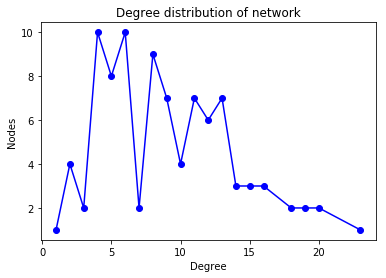

In [27]:
dc = Counter(dict(nx.degree(G)).values())
x = []
y = []
for degree, count in sorted(dc.items(), key=lambda x:x[0]):
    x.append(degree)
    y.append(count)

plt.plot(x, y,'bo-')
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.title('Degree distribution of network')
plt.show()

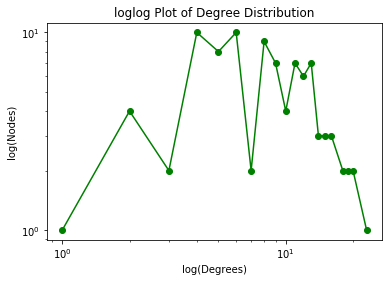

In [29]:
plt.loglog(x, y,'go-')
plt.xlabel('log(Degrees)')
plt.ylabel('log(Nodes)')
plt.title('loglog Plot of Degree Distribution')
plt.show()

Centrality Measurements

In [30]:
deg_cen = nx.degree_centrality(G)
clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
katz_cen = nx.katz_centrality(G, alpha=alpha*.9)
page_cen = nx.pagerank(G)

print('Degree centrality:', deg_cen,'\n')
print('Closeness centrality:', clo_cen, '\n')
print('Betweenness centrality:', bet_cen, '\n')
print('Eigenvector centrality:', eig_cen, '\n')
print('Katz centrality:', katz_cen, '\n')
print('Page Rank:', page_cen)

Degree centrality: {'student51': 0.08695652173913043, 'student12': 0.11956521739130435, 'student44': 0.06521739130434782, 'student59': 0.043478260869565216, 'student70': 0.06521739130434782, 'student41': 0.021739130434782608, 'student16': 0.15217391304347827, 'student67': 0.09782608695652173, 'student45': 0.21739130434782608, 'student63': 0.08695652173913043, 'student20': 0.16304347826086957, 'student78': 0.11956521739130435, 'student7': 0.19565217391304346, 'student6': 0.13043478260869565, 'student55': 0.14130434782608695, 'student3': 0.14130434782608695, 'student68': 0.11956521739130435, 'student52': 0.05434782608695652, 'student39': 0.13043478260869565, 'student73': 0.11956521739130435, 'student8': 0.17391304347826086, 'student4': 0.08695652173913043, 'student1': 0.16304347826086957, 'student91': 0.25, 'student93': 0.11956521739130435, 'student11': 0.08695652173913043, 'student82': 0.20652173913043478, 'student48': 0.08695652173913043, 'student35': 0.09782608695652173, 'student15': 

Question: Who are the top 5 users based on the following centrality measures: degree, pagerank, closeness, betweenness?

In [31]:
import operator
top_degree = dict(sorted(deg_cen.items(), key=operator.itemgetter(1), reverse=True)[:5])
print(str(top_degree) + "\n")

top_closeness = dict(sorted(clo_cen.items(), key=operator.itemgetter(1), reverse=True)[:5])
print(str(top_closeness) + "\n")

top_betweenness = dict(sorted(bet_cen.items(), key=operator.itemgetter(1), reverse=True)[:5])
print(str(top_betweenness) + "\n")

top_page_rank = dict(sorted(page_cen.items(), key=operator.itemgetter(1), reverse=True)[:5])
print(str(top_page_rank))

{'student91': 0.25, 'student45': 0.21739130434782608, 'student38': 0.21739130434782608, 'student82': 0.20652173913043478, 'student36': 0.20652173913043478}

{'student39': 0.4791666666666667, 'student5': 0.47668393782383417, 'student91': 0.4742268041237113, 'student18': 0.4623115577889447, 'student45': 0.4577114427860697}

{'student16': 0.1881248514204771, 'student39': 0.08945121798152902, 'student18': 0.07476889713450623, 'student5': 0.06970077215726139, 'student87': 0.06510026181050196}

{'student91': 0.022008138886642818, 'student16': 0.021044180018912197, 'student38': 0.019556305212903746, 'student45': 0.01915722711330771, 'student36': 0.018649935347233797}


# Visualizing A Network

Name: 
Type: Graph
Number of nodes: 93
Number of edges: 428
Average degree:   9.2043


c:\users\utkar\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


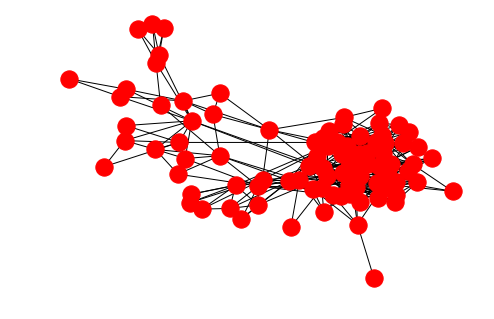

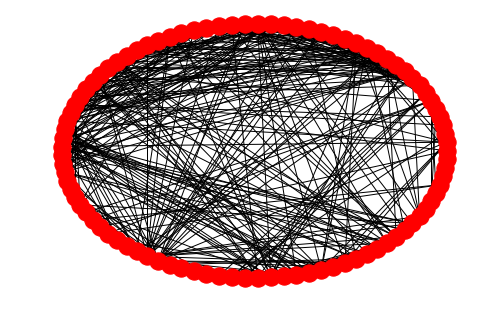

In [32]:
print(nx.info(G))
nx.draw(G)
plt.show()

nx.draw_circular(G)
plt.show()

# Community Detection

In [33]:
clustering_coef=nx.clustering(G)
print('Clustering:',clustering_coef)

Clustering: {'student51': 0.25, 'student12': 0.25, 'student44': 0.5333333333333333, 'student59': 0.8333333333333334, 'student70': 0.5333333333333333, 'student41': 0, 'student16': 0.16666666666666666, 'student67': 0.38095238095238093, 'student45': 0.2789473684210526, 'student63': 0.17857142857142858, 'student20': 0.2761904761904762, 'student78': 0.23636363636363636, 'student7': 0.35947712418300654, 'student6': 0.5303030303030303, 'student55': 0.21794871794871795, 'student3': 0.23076923076923078, 'student68': 0.6181818181818182, 'student52': 0.8, 'student39': 0.3181818181818182, 'student73': 0.43636363636363634, 'student8': 0.32967032967032966, 'student4': 0.17857142857142858, 'student1': 0.32051282051282054, 'student91': 0.22924901185770752, 'student93': 0.4909090909090909, 'student11': 0.5333333333333333, 'student82': 0.2982456140350877, 'student48': 0.32142857142857145, 'student35': 0.5833333333333334, 'student15': 0.25, 'student19': 0.24444444444444444, 'student83': 0.666666666666666

Is this local or global?
Compute the other.